In [41]:
from enum import unique
import importlib
import xgi
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools
from HONG import *
import HONG
importlib.reload(HONG)
import csv
from tqdm import tqdm
import csv
from numpy import genfromtxt
import matplotlib as mpl
import pandas as pd
import seaborn as sb


mpl.style.use('report_style.mplstyle')

In [42]:
prop_committed = np.linspace(0.01, 0.2,20)
betas = np.linspace(0.05, 1, 20)
ensemble_size = 10
run_length = 10**6
qs = [1, 0]
social_structures = ['InVS15']#, 'LyonSchool', 'SFHH', 'Thiers13']

# Plotting

           0.0      0.02      0.04      0.06      0.08       0.1      0.12  \
0.03  0.028169  0.029343  0.034695  0.039812  0.034296  0.045376  0.039061   

          0.14      0.16      0.18  ...      0.82      0.84      0.86  \
0.03  0.048779  0.070141  0.100258  ... -0.943662 -0.943662 -0.943662   

          0.88       0.9      0.92      0.94      0.96      0.98       1.0  
0.03 -0.943662 -0.943662 -0.943662 -0.943662 -0.943662 -0.943662 -0.943662  

[1 rows x 51 columns]
0.0     0.028169
0.02    0.029343
0.04    0.034695
0.06    0.039812
0.08    0.034296
0.1     0.045376
0.12    0.039061
0.14    0.048779
0.16    0.070141
0.18    0.100258
0.2     0.106291
0.22    0.128873
0.24    0.188967
0.26    0.212277
0.28    0.251479
0.3     0.442958
0.32    0.995305
0.34    1.000000
0.36    0.990610
0.38    1.000000
0.4    -0.938967
0.42   -0.934272
0.44   -0.943662
0.46   -0.943662
0.48   -0.943662
0.5    -0.943662
0.52   -0.943662
0.54   -0.943662
0.56   -0.943662
0.58   -0.943662
0.6    -0

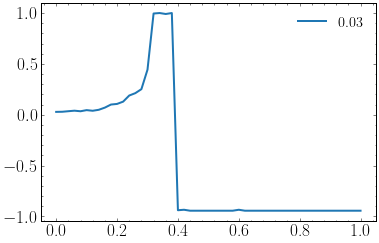

In [15]:


for social_structure in social_structures:
    for q in qs:

        fname = f'heatmap_res_{len(prop_committed)}x{len(betas)}_{social_structure}_{q}_{run_length}_{ensemble_size}'

        data = pd.read_csv(f'finished_outputs/{fname}.csv', index_col=0)
        print(data.head())
        print(data.iloc[0])
        data.T.plot()


#         plt.figure(1)
#         plt.plot(betas, Astar_list, color='k', linestyle='--', label='A')
#         plt.fill_between(betas, Astar25_list, Astar75_list, color='k', alpha=0.2)

#         plt.plot(betas, Bstar_list, color='tab:blue', label='B')
#         plt.fill_between(betas, Bstar25_list, Bstar75_list, color='tab:blue', alpha=0.2)

#         plt.legend(title=r'$x$')
#         plt.title(f'{social_structure}_q={q}')
#         plt.xlabel(r'$\beta$')
#         plt.ylabel(r'$N^{\ast}_{x}(\beta)$')
#         plt.savefig(f'figures/fig3b_{social_structure}_{prop_committed}_{run_length}_{ensemble_size}.pdf')
#         plt.show()




# Heat Map

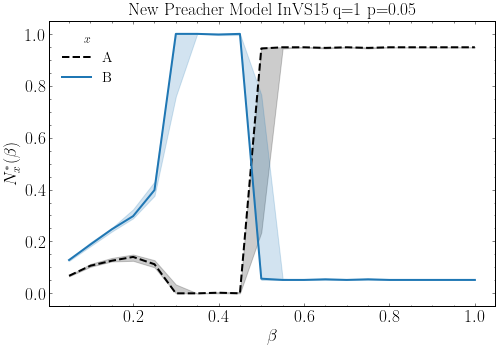

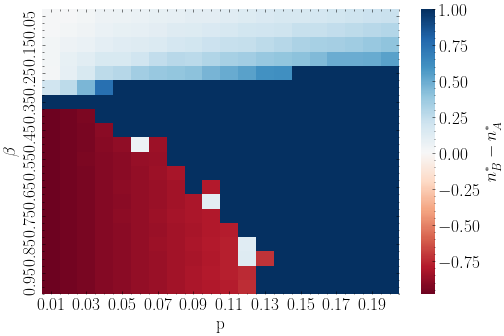

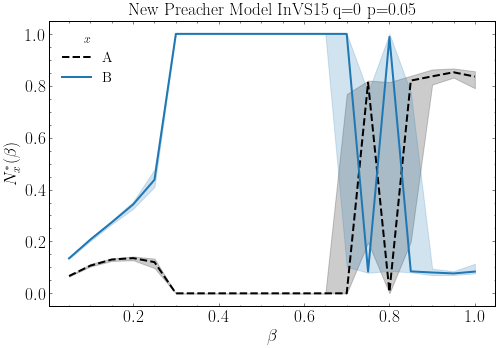

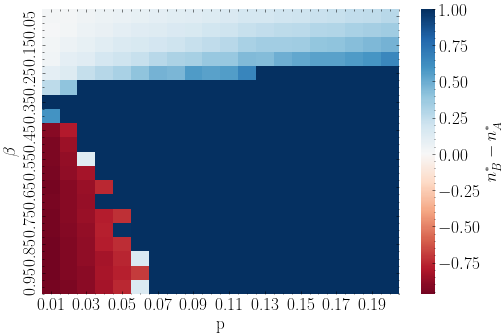

In [44]:

for social_structure in social_structures:
    
    for q in qs:

        fname_A = f'heatmap_A_res_{len(betas)}x{len(prop_committed)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_A = pd.read_csv(f'finished_outputs/{fname_A}.csv', index_col=0)
        fname_A = f'heatmap_A25_res_{len(betas)}x{len(prop_committed)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_A25 = pd.read_csv(f'finished_outputs/{fname_A}.csv', index_col=0)
        fname_A = f'heatmap_A75_res_{len(betas)}x{len(prop_committed)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_A75 = pd.read_csv(f'finished_outputs/{fname_A}.csv', index_col=0)
        fname_B = f'heatmap_B_res_{len(betas)}x{len(prop_committed)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_B = pd.read_csv(f'finished_outputs/{fname_B}.csv', index_col=0)
        fname_B = f'heatmap_B25_res_{len(betas)}x{len(prop_committed)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_B25 = pd.read_csv(f'finished_outputs/{fname_B}.csv', index_col=0)
        fname_B = f'heatmap_B75_res_{len(betas)}x{len(prop_committed)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_B75 = pd.read_csv(f'finished_outputs/{fname_B}.csv', index_col=0)
        
        for p in [0.05]:
            p = round(p,2)
            plt.figure()
            plt.plot(data_A.index.values, data_A[f'{p}'], color='k', linestyle='--', label='A')
            plt.fill_between(data_A.index.values, data_A25[f'{p}'], data_A75[f'{p}'], color='k', alpha=0.2)

            plt.plot(data_B.index.values, data_B[f'{p}'], color='tab:blue', label='B')
            plt.fill_between(data_B.index.values, data_B25[f'{p}'], data_B75[f'{p}'], color='tab:blue', alpha=0.2)

            plt.legend(title=r'$x$')
            plt.title(f'New Preacher Model {social_structure} q={q} p={p}')
            plt.xlabel(r'$\beta$')
            plt.ylabel(r'$N^{\ast}_{x}(\beta)$')
            plt.savefig(f'figures/fig3b_{social_structure}_{p}_q={q}_{run_length}_{ensemble_size}.pdf')
            plt.show()
        
        colormap = sb.color_palette(palette="RdBu", n_colors=None, desat=None, as_cmap=True)
        sb.heatmap(data_B-data_A, cbar_kws={'label':r'$n_{B}^{\ast}-n_{A}^{\ast}$'}, cmap=colormap, center=0)
        plt.xlabel('p')
        plt.ylabel(r'$\beta$')
        plt.savefig(f'figures/heatmap_res_{len(betas)}x{len(prop_committed)}_{social_structure}_{q}_{run_length}_{ensemble_size}.pdf')